# Intro to XGI
### Violet Ross

In [1]:
import xgi
import numpy as np
import random

a) Creating a Hypergraph


In [2]:
hyperedges = [[1,2], [2,3,4], [4,5], [1,5]]
hypergraph = xgi.Hypergraph(hyperedges)

b) Setting Node Labels

In [3]:
hypergraph.set_node_attributes({1 : 0, 2 : 1, 3 : 0, 4 : 1, 5 : 0}, name = "label") # set labels

In [4]:
hypergraph.nodes.attrs.asdict()

{1: {'label': 0},
 2: {'label': 1},
 3: {'label': 0},
 4: {'label': 1},
 5: {'label': 0}}

c) Edge-adding function

In [5]:
def add_hyperedge(hypergraph, hyperedge, newlabels):
  c = 0
  for node in hyperedge:
    if node not in hypergraph.nodes:
        hypergraph.add_node(node)
        hypergraph.set_node_attributes({node : newlabels[c]}, name = "label")
        c += 1
  hypergraph.add_edge(hyperedge)

Number of nodes is 5


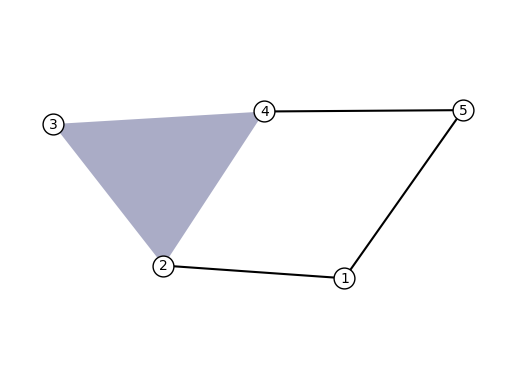

In [6]:
## Test function

# Draw our hypergraph from part a and find the number of nodes
xgi.draw(hypergraph, node_labels = True, node_size = 15)
print("Number of nodes is " + str(hypergraph.num_nodes))

Number of nodes is 6


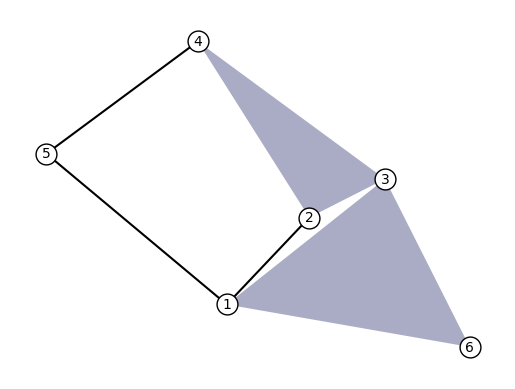

In [7]:
# Add an edge to the hypergraph
edge = [1,3,6]
add_hyperedge(hypergraph, edge, [0])

# Draw it and find the new number of nodes
xgi.draw(hypergraph, node_labels = True, node_size = 15)
print("Number of nodes is " + str(hypergraph.num_nodes))

d) Degree Sequence and Edge Size Sequence

In [8]:
hypergraph.nodes.degree.aslist()

[3, 2, 2, 2, 2, 1]

In [9]:
hypergraph.edges.order.aslist()

[1, 2, 1, 1, 2]

f) Advanced Edge-Adding Function

In [10]:
def add_hyperedge_adv(hypergraph, p):
  new_edge = [] # create an empty new edge
  edge_num = random.randint(0, hypergraph.num_edges - 1) # randomly select an existing hyperedge to start with
  edge = hypergraph.edges.members()[edge_num]
  for node in edge: # add each node in the existing hyperedge to our new edge with prob p
    if random.random() < p:
      new_edge.append(node)
  exterior_node = random.sample(list(hypergraph.nodes - edge), 1)[0] # randomly sample a node from outside the existing hyperedge
  new_edge.append(exterior_node) # add that exterior node to the new edge
  newnode = len(hypergraph.nodes) + 1
  hypergraph.add_node(newnode) # add a new node to the hypergraph
  new_edge.append(newnode) # add that new node to the new edge
  hypergraph.add_edge(new_edge) # add the new edge to the hypergraph

In [11]:
add_hyperedge_adv(hypergraph, 0.5)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x175cd09a0>,
  <matplotlib.collections.PatchCollection at 0x175cd1f60>))

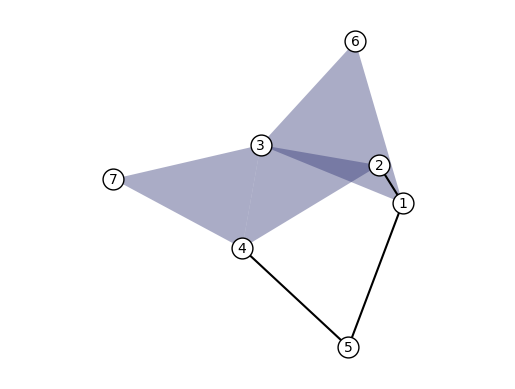

In [12]:
xgi.draw(hypergraph, node_labels = True, node_size = 15)